In [2]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns; sns.set()

# 1

Пользуемся первой ссылкой из предложенных:

In [2]:
API_KEY = "IB2C24DNR5CAQ6G4"
API_LINK = "https://www.alphavantage.co/query"

In [3]:
apple_data_json = requests.get(API_LINK, params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "AAPL",
    "outputsize": "full",
    "apikey": API_KEY
}).json()

In [4]:
google_data_json = requests.get(API_LINK, params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "GOOGL",
    "outputsize": "full",
    "apikey": API_KEY
}).json()

In [5]:
facebook_data_json = requests.get(API_LINK, params = {
    "function": "TIME_SERIES_DAILY",
    "symbol": "FB",
    "outputsize": "full",
    "apikey": API_KEY
}).json()

In [6]:
apple_data_json.keys(), google_data_json.keys(), facebook_data_json.keys()

(dict_keys(['Meta Data', 'Time Series (Daily)']),
 dict_keys(['Meta Data', 'Time Series (Daily)']),
 dict_keys(['Meta Data', 'Time Series (Daily)']))

In [7]:
apple_data_raw = apple_data_json['Time Series (Daily)']
google_data_raw = google_data_json['Time Series (Daily)']
facebook_data_raw = facebook_data_json['Time Series (Daily)']

In [8]:
apple_data_raw

{'2020-05-28': {'1. open': '316.7700',
  '2. high': '323.4400',
  '3. low': '315.6300',
  '4. close': '318.2500',
  '5. volume': '33362141'},
 '2020-05-27': {'1. open': '316.1400',
  '2. high': '318.7100',
  '3. low': '313.0900',
  '4. close': '318.1100',
  '5. volume': '27389979'},
 '2020-05-26': {'1. open': '323.5000',
  '2. high': '324.2400',
  '3. low': '316.5000',
  '4. close': '316.7300',
  '5. volume': '31380454'},
 '2020-05-22': {'1. open': '315.7700',
  '2. high': '319.2300',
  '3. low': '315.3500',
  '4. close': '318.8900',
  '5. volume': '20450754'},
 '2020-05-21': {'1. open': '318.6600',
  '2. high': '320.8900',
  '3. low': '315.8700',
  '4. close': '316.8500',
  '5. volume': '25672211'},
 '2020-05-20': {'1. open': '316.6800',
  '2. high': '319.5200',
  '3. low': '316.2000',
  '4. close': '319.2300',
  '5. volume': '27876215'},
 '2020-05-19': {'1. open': '315.0300',
  '2. high': '318.5200',
  '3. low': '313.0100',
  '4. close': '313.1400',
  '5. volume': '25432385'},
 '2020

In [19]:
apple_data = [(datetime.datetime.strptime(date, '%Y-%m-%d'),
               float(entry['4. close'])) for date, entry in apple_data_raw.items()]
google_data = [(datetime.datetime.strptime(date, '%Y-%m-%d'),
                float(entry['4. close'])) for date, entry in google_data_raw.items()]
facebook_data = [(datetime.datetime.strptime(date, '%Y-%m-%d'),
                  float(entry['4. close'])) for date, entry in facebook_data_raw.items()]

In [20]:
apple_data

[(datetime.datetime(2020, 5, 28, 0, 0), 318.25),
 (datetime.datetime(2020, 5, 27, 0, 0), 318.11),
 (datetime.datetime(2020, 5, 26, 0, 0), 316.73),
 (datetime.datetime(2020, 5, 22, 0, 0), 318.89),
 (datetime.datetime(2020, 5, 21, 0, 0), 316.85),
 (datetime.datetime(2020, 5, 20, 0, 0), 319.23),
 (datetime.datetime(2020, 5, 19, 0, 0), 313.14),
 (datetime.datetime(2020, 5, 18, 0, 0), 314.96),
 (datetime.datetime(2020, 5, 15, 0, 0), 307.71),
 (datetime.datetime(2020, 5, 14, 0, 0), 309.54),
 (datetime.datetime(2020, 5, 13, 0, 0), 307.65),
 (datetime.datetime(2020, 5, 12, 0, 0), 311.41),
 (datetime.datetime(2020, 5, 11, 0, 0), 315.01),
 (datetime.datetime(2020, 5, 8, 0, 0), 310.13),
 (datetime.datetime(2020, 5, 7, 0, 0), 303.74),
 (datetime.datetime(2020, 5, 6, 0, 0), 300.63),
 (datetime.datetime(2020, 5, 5, 0, 0), 297.56),
 (datetime.datetime(2020, 5, 4, 0, 0), 293.16),
 (datetime.datetime(2020, 5, 1, 0, 0), 289.07),
 (datetime.datetime(2020, 4, 30, 0, 0), 293.8),
 (datetime.datetime(2020, 4

In [40]:
apple = [(date, stock) for date, stock in sorted(apple_data) if date.year >= 2010]
google = [(date, stock) for date, stock in sorted(google_data) if date.year >= 2010]
facebook = [(date, stock) for date, stock in sorted(facebook_data) if date.year >= 2010]

In [95]:
apple[:5], google[:5], facebook[:5]

([(datetime.datetime(2010, 1, 4, 0, 0), 214.01),
  (datetime.datetime(2010, 1, 5, 0, 0), 214.38),
  (datetime.datetime(2010, 1, 6, 0, 0), 210.97),
  (datetime.datetime(2010, 1, 7, 0, 0), 210.58),
  (datetime.datetime(2010, 1, 8, 0, 0), 211.98)],
 [(datetime.datetime(2010, 1, 4, 0, 0), 626.75),
  (datetime.datetime(2010, 1, 5, 0, 0), 623.99),
  (datetime.datetime(2010, 1, 6, 0, 0), 608.26),
  (datetime.datetime(2010, 1, 7, 0, 0), 594.1),
  (datetime.datetime(2010, 1, 8, 0, 0), 602.02)],
 [(datetime.datetime(2012, 5, 18, 0, 0), 38.2318),
  (datetime.datetime(2012, 5, 21, 0, 0), 34.03),
  (datetime.datetime(2012, 5, 22, 0, 0), 31.0),
  (datetime.datetime(2012, 5, 23, 0, 0), 32.0),
  (datetime.datetime(2012, 5, 24, 0, 0), 33.03)])

In [102]:
apple[-5:], google[-5:], facebook[-5:]

([(datetime.datetime(2020, 5, 21, 0, 0), 316.85),
  (datetime.datetime(2020, 5, 22, 0, 0), 318.89),
  (datetime.datetime(2020, 5, 26, 0, 0), 316.73),
  (datetime.datetime(2020, 5, 27, 0, 0), 318.11),
  (datetime.datetime(2020, 5, 28, 0, 0), 318.25)],
 [(datetime.datetime(2020, 5, 21, 0, 0), 1406.75),
  (datetime.datetime(2020, 5, 22, 0, 0), 1413.24),
  (datetime.datetime(2020, 5, 26, 0, 0), 1421.37),
  (datetime.datetime(2020, 5, 27, 0, 0), 1420.28),
  (datetime.datetime(2020, 5, 28, 0, 0), 1418.24)],
 [(datetime.datetime(2020, 5, 21, 0, 0), 231.39),
  (datetime.datetime(2020, 5, 22, 0, 0), 234.91),
  (datetime.datetime(2020, 5, 26, 0, 0), 232.2),
  (datetime.datetime(2020, 5, 27, 0, 0), 229.14),
  (datetime.datetime(2020, 5, 28, 0, 0), 225.46)])

У facebook история начинается лишь с 2012 года, начнем с этого момента (в итоге будет 8 лет, а не 10, но при этом не придется 20% временного ряда интерполировать в начале).

In [103]:
days = pd.date_range(facebook[0][0], datetime.datetime.now(), freq='D')

In [104]:
df = pd.DataFrame({'date': days, 'apple': [np.nan] * len(days), 
                   'google': [np.nan] * len(days), 
                   'facebook': [np.nan] * len(days)})
df = df.set_index('date')
df.head(7)

,apple,google,facebook
date,,,
2012-05-18,NaN,NaN,NaN
2012-05-19,NaN,NaN,NaN
2012-05-20,NaN,NaN,NaN
2012-05-21,NaN,NaN,NaN
2012-05-22,NaN,NaN,NaN
2012-05-23,NaN,NaN,NaN
2012-05-24,NaN,NaN,NaN


In [105]:
for date, entry in apple:
    df.loc[df.index == date, 'apple'] = entry
    
for date, entry in google:
    df.loc[df.index == date, 'google'] = entry
    
for date, entry in facebook:
    df.loc[df.index == date, 'facebook'] = entry

In [106]:
df.head(7)

,apple,google,facebook
date,,,
2012-05-18,530.38,600.40,38.2318
2012-05-19,NaN,NaN,NaN
2012-05-20,NaN,NaN,NaN
2012-05-21,561.28,614.11,34.0300
2012-05-22,556.97,600.80,31.0000
2012-05-23,570.56,609.46,32.0000
2012-05-24,565.32,603.66,33.0300


Заполним пропуски с помощью интерполяции.

In [107]:
df = df.interpolate(limit_direction='both')
df.head(7)

,apple,google,facebook
date,,,
2012-05-18,530.38,600.40,38.2318
2012-05-19,540.68,604.97,36.8312
2012-05-20,550.98,609.54,35.4306
2012-05-21,561.28,614.11,34.0300
2012-05-22,556.97,600.80,31.0000
2012-05-23,570.56,609.46,32.0000
2012-05-24,565.32,603.66,33.0300


In [153]:
df.to_csv('stocks.csv')

# 2

In [3]:
from sklearn import decomposition, pipeline, preprocessing
import scipy.stats as scs
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.stats.diagnostic as smsd

In [4]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [5]:
df = pd.read_csv('stocks.csv')
df.head(7)

,date,apple,google,facebook
0,2012-05-18,530.38,600.40,38.2318
1,2012-05-19,540.68,604.97,36.8312
2,2012-05-20,550.98,609.54,35.4306
3,2012-05-21,561.28,614.11,34.0300
4,2012-05-22,556.97,600.80,31.0000
5,2012-05-23,570.56,609.46,32.0000
6,2012-05-24,565.32,603.66,33.0300


In [28]:
dates = df['date']

In [7]:
stocks = ['apple', 'google', 'facebook']

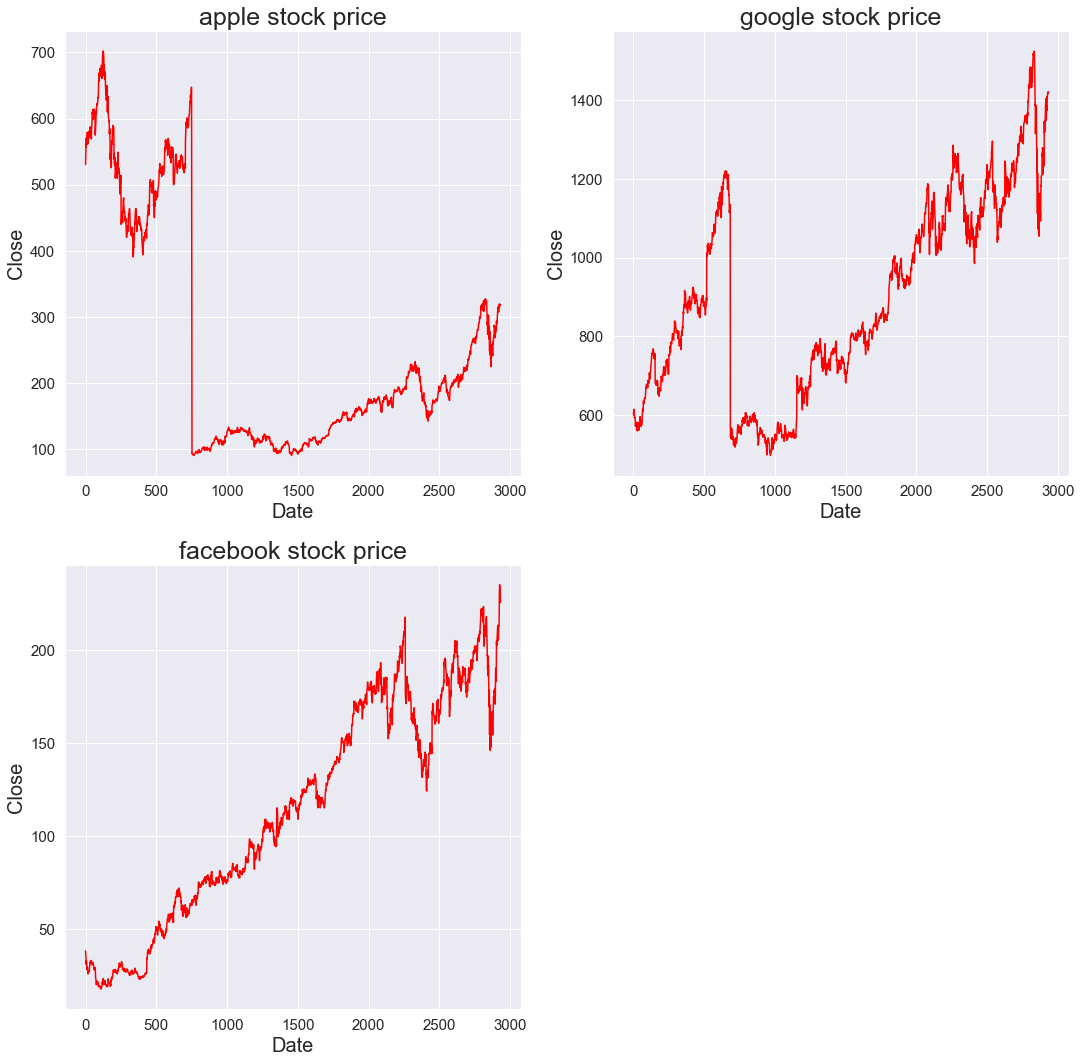

In [8]:
plt.figure(figsize=(18, 18))
for idx, stock in enumerate(stocks, 1):
    plt.subplot(2, 2, idx)
    plt.plot(df[stock], c='red')
    plt.title(stock + ' stock price', fontsize=25)
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Close', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

In [9]:
returns = {stock: (df[stock].values[1:] - df[stock].values[:-1])/df[stock].values[:-1] for stock in stocks}

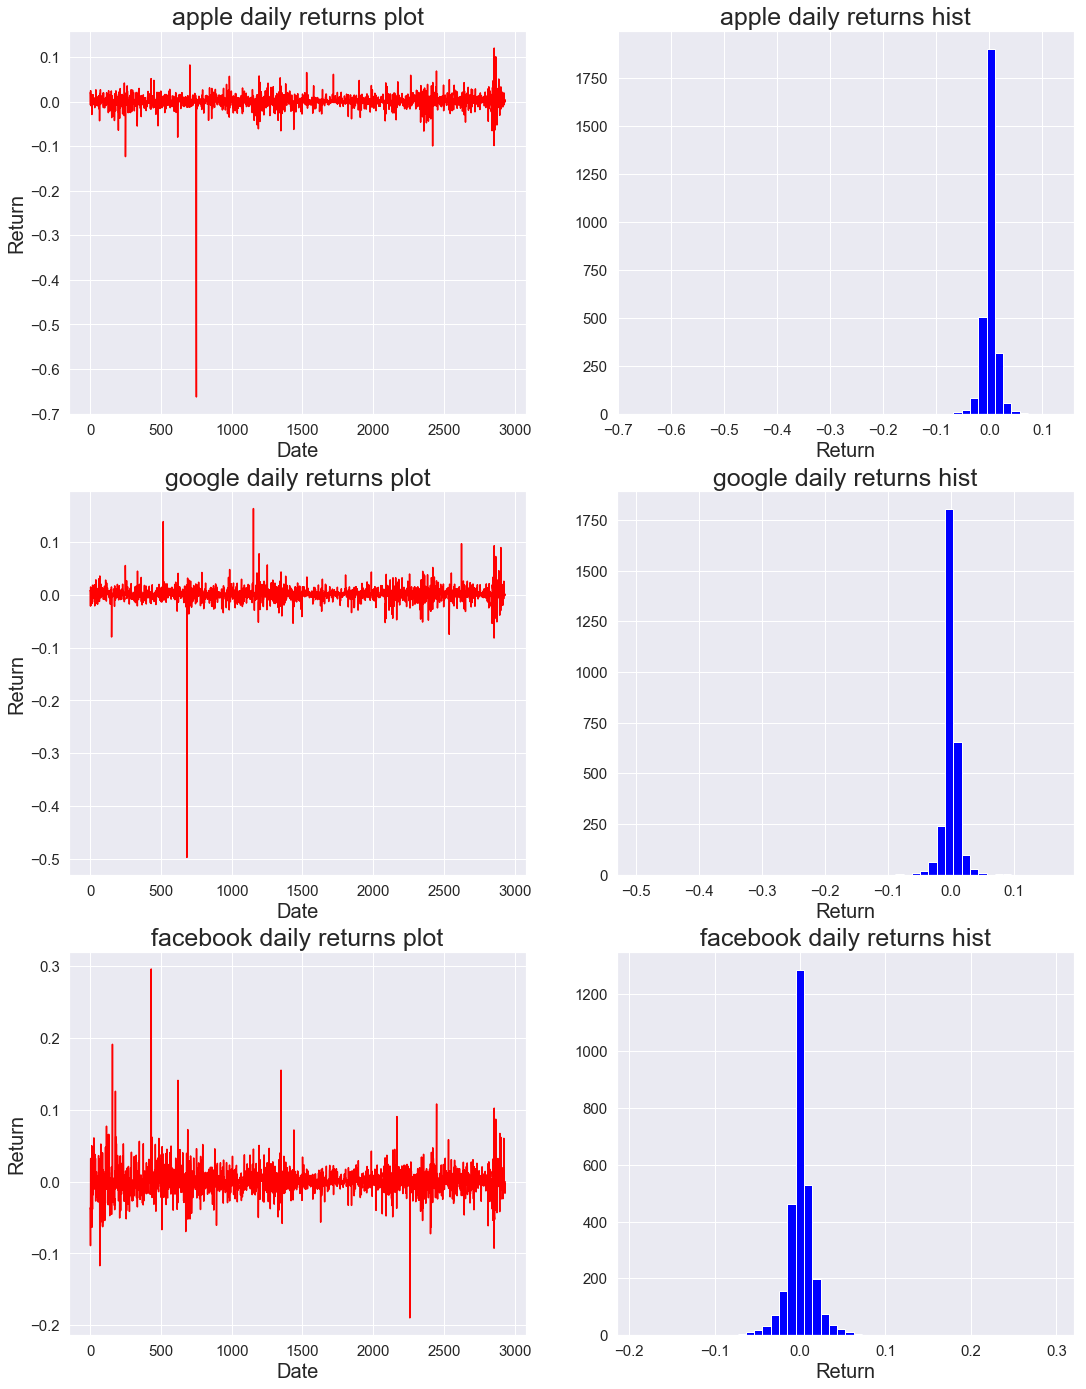

In [10]:
plt.figure(figsize=(18, 24))
for idx, stock in enumerate(stocks):
    plt.subplot(3, 2, 2*idx+1)
    plt.plot(returns[stock], c='red')
    plt.title(stock + ' daily returns plot', fontsize=25)
    plt.xlabel('Date', fontsize=20)
    plt.ylabel('Return', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.subplot(3, 2, 2*idx+2)
    plt.hist(returns[stock], bins=50, color='blue')
    plt.title(stock + ' daily returns hist', fontsize=25)
    plt.xlabel('Return', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

Посчитаем статистики встроенным методом в pandas.Series:

In [13]:
for stock in returns:
    print(stock + " statistics:")
    print(pd.Series(returns[stock]).describe())
    print()

apple statistics:
count    2933.000000
mean        0.000112
std         0.020137
min        -0.662533
25%        -0.004336
50%         0.000726
75%         0.005674
max         0.119808
dtype: float64

google statistics:
count    2933.000000
mean        0.000431
std         0.015224
min        -0.496520
25%        -0.003670
50%         0.000436
75%         0.004679
max         0.162584
dtype: float64

facebook statistics:
count    2933.000000
mean        0.000765
std         0.018049
min        -0.189609
25%        -0.005432
50%         0.000495
75%         0.006328
max         0.296077
dtype: float64



Проверим все returns на схожесть с нормальным распределением. Первичный визуальный признак - гистограмма. Если учесть маленькие дисперии, и не обращать внимание на выбросы, то профиль в целом напоминает нормальный.

Посмотрим теперь на QQ-plot:

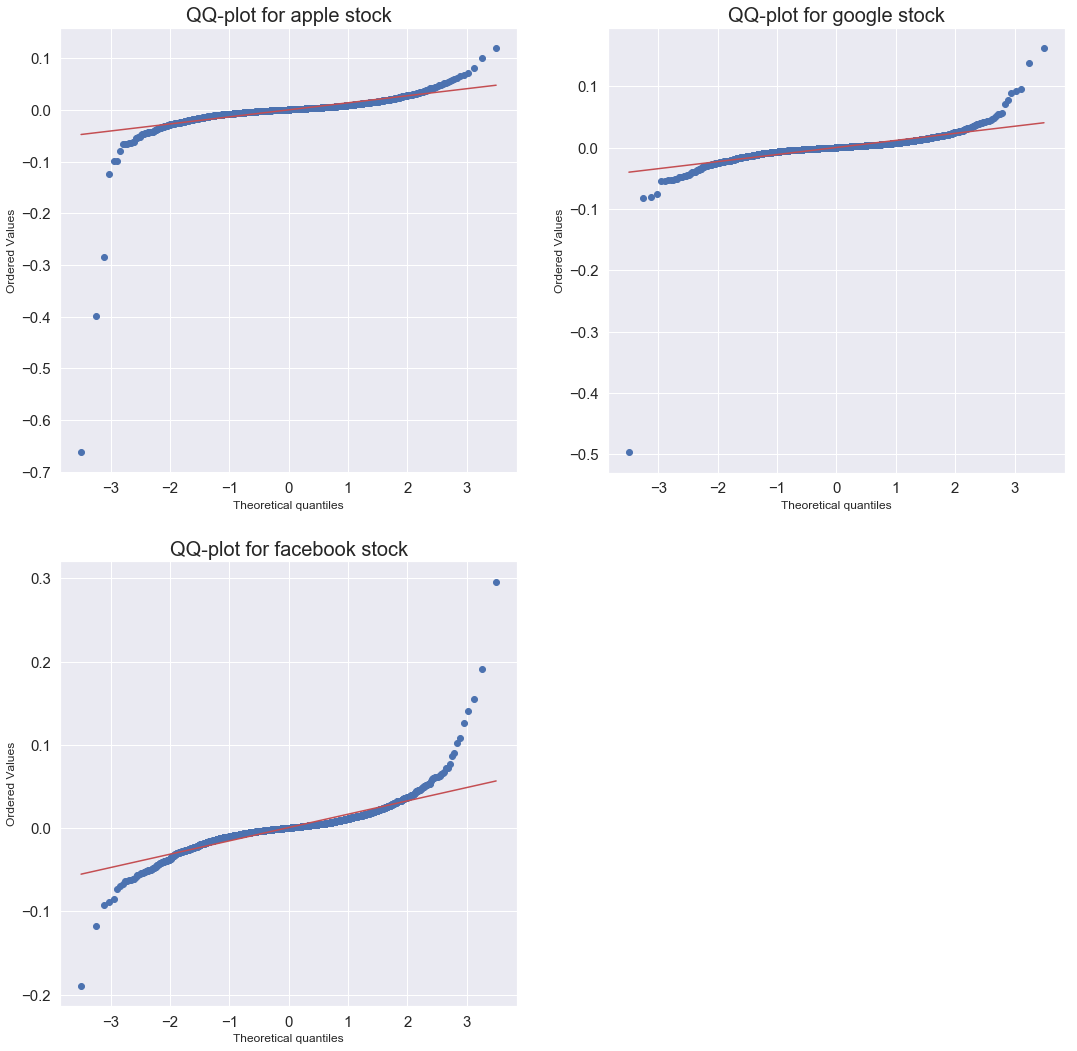

In [14]:
plt.figure(figsize=(18, 18))
for idx, stock in enumerate(returns, 1):
    plt.subplot(2, 2, idx)
    scs.probplot(returns[stock], plot=plt)
    plt.title('QQ-plot for ' + stock + ' stock', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

Такое отклонение хвостов (вниз слева и вверх справа) означает, что хосты слишком тяжелы для нормального распределения. Возможно, это вызвано выбросами, но, судя по "гладкости" получающейся кривой, распределение все же не очень похоже на нормальное.

Посмотрим на p-value нескольких статистических тестов:

Шапиро-Уилка:

In [15]:
for stock in returns:
    print("p-value for " + stock + ":")
    print(scs.shapiro(returns[stock])[1])
    print()

p-value for apple:
0.0

p-value for google:
0.0

p-value for facebook:
0.0



Харке-Бера:

In [16]:
for stock in returns:
    print("p-value for " + stock + ":")
    print(scs.normaltest(returns[stock]).pvalue)
    print()

p-value for apple:
0.0

p-value for google:
0.0

p-value for facebook:
0.0



Лиллиефорса:

In [17]:
for stock in returns:
    print("p-value for " + stock + ":")
    print(smsd.lilliefors(returns[stock], dist='norm', pvalmethod='table')[1])
    print()

p-value for apple:
0.0009999999999998899

p-value for google:
0.0009999999999998899

p-value for facebook:
0.0009999999999998899



Все статистические тесты дали p-value 0 для всех трех акций (кроме третьего, похоже, что для него это минимальное значение, так как p-value вычисляется по таблице). Таким образом, можно заключить, что распределение return'ов не нормальное.

Визуально все три ряда выглядят как стационарные. Проверим стационарность критерием Дики-Фуллера:

In [18]:
for stock in returns:
    print("p-value for " + stock + ":")
    print(sm.tsa.stattools.adfuller(returns[stock])[1])
    print()

p-value for apple:
0.0

p-value for google:
0.0

p-value for facebook:
0.0



Действительно, гипотеза отвергается с нулевым p-value, поэтому все три ряда стационарны.

Чтобы проверить взаимосвязь между прошлыми и будущими значениями, построим график автокорреляции. Проверим значимость с $\alpha = 0.05$.

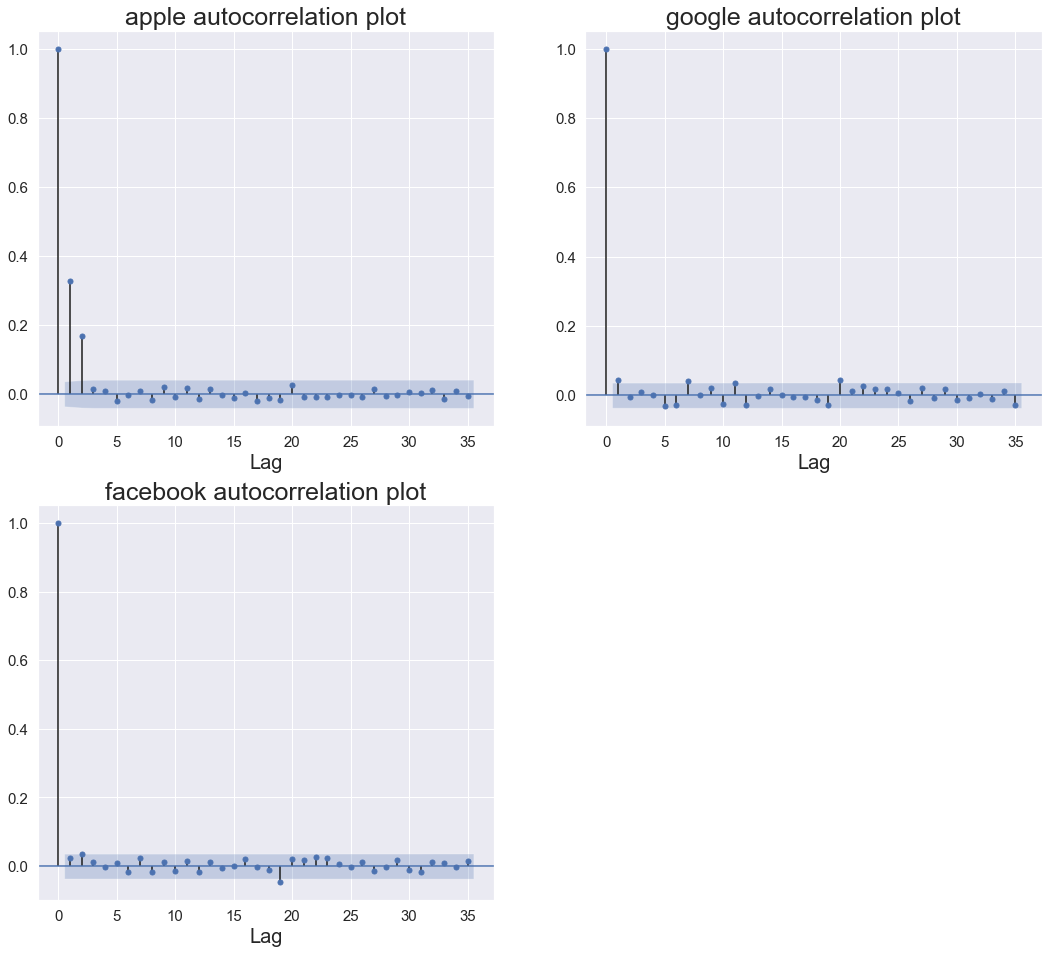

In [19]:
plt.figure(figsize=(18, 16))
for idx, stock in enumerate(returns, 1):
    ax = plt.subplot(2, 2, idx)
    smt.graphics.plot_acf(returns[stock], ax=ax, alpha=0.05)
    plt.title(stock + ' autocorrelation plot', fontsize=25)
    plt.xlabel('Lag', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

У акций Apple первые два лага значимы, из чего можно сделать вывод, что значимая связь, скорее всего, есть между последовательными днями. У всех остальных есть лаги на границе значимости, которые можно списать на множественную проверку гипотез и не учитывать.

Посмотрим на корреляции между return'ами:

In [20]:
pd.DataFrame(returns).corr()

,apple,google,facebook
apple,1.000000,0.264561,0.232648
google,0.264561,1.000000,0.405985
facebook,0.232648,0.405985,1.000000


Значения положительно коррелируют между собой.

Сделаем Granger causality test:

In [21]:
for cause in returns:
    for effect in returns:
        if cause == effect:
            continue
        print(f"Granger causality test for {cause} causing {effect}:")
        smt.stattools.grangercausalitytests(np.vstack([returns[effect], returns[cause]]).T, 1)
        print()

Granger causality test for apple causing google:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=3.0147  , p=0.0826  , df_denom=2929, df_num=1
ssr based chi2 test:   chi2=3.0178  , p=0.0824  , df=1
likelihood ratio test: chi2=3.0162  , p=0.0824  , df=1
parameter F test:         F=3.0147  , p=0.0826  , df_denom=2929, df_num=1

Granger causality test for apple causing facebook:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=9.8653  , p=0.0017  , df_denom=2929, df_num=1
ssr based chi2 test:   chi2=9.8754  , p=0.0017  , df=1
likelihood ratio test: chi2=9.8588  , p=0.0017  , df=1
parameter F test:         F=9.8653  , p=0.0017  , df_denom=2929, df_num=1

Granger causality test for google causing apple:

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=32.6162 , p=0.0000  , df_denom=2929, df_num=1
ssr based chi2 test:   chi2=32.6496 , p=0.0000  , df=1
likelihood ratio test: chi2=32.4692 , p=0.0000  , df=1
parameter F

На уровне значимости $0.05$ отвергается взаимосвязь facebook и google, а так же что apple влияет на google. Все остальные связи уверенно принимаются верными.

Сделаем PCA-разложение return'ов и посмотрим на главные компоненты и соответствующие сингулярные числа:

In [22]:
scaled_df = pd.DataFrame({stock: preprocessing.StandardScaler().fit_transform(
    entry.reshape(-1, 1)).flatten() for stock, entry in returns.items()})

In [23]:
pca = decomposition.PCA()
pca.fit(scaled_df)

PCA()

In [24]:
scaled_df.columns

Index(['apple', 'google', 'facebook'], dtype='object')

In [25]:
pca.components_

array([[-0.5001932 , -0.62010587, -0.60438024],
       [-0.8614606 ,  0.2856651 ,  0.4198584 ],
       [ 0.08770632, -0.73066008,  0.67708452]])

In [26]:
pca.explained_variance_

array([1.60963988, 0.79915499, 0.59222832])

Компонента с минимальной дисперсией имеет маленькую проекцию на 'ось' Apple и большие проекцие на две остальные оси. Это в некотором роде согласуется с результатом Granger causality: видимо, у Google и Facebook связь действительно слабее, чем у других пар, несмотря на большую корреляцию.

# 3

In [48]:
N = len(returns['apple'])
N

2933

Строим графики для $5$ реализаций:

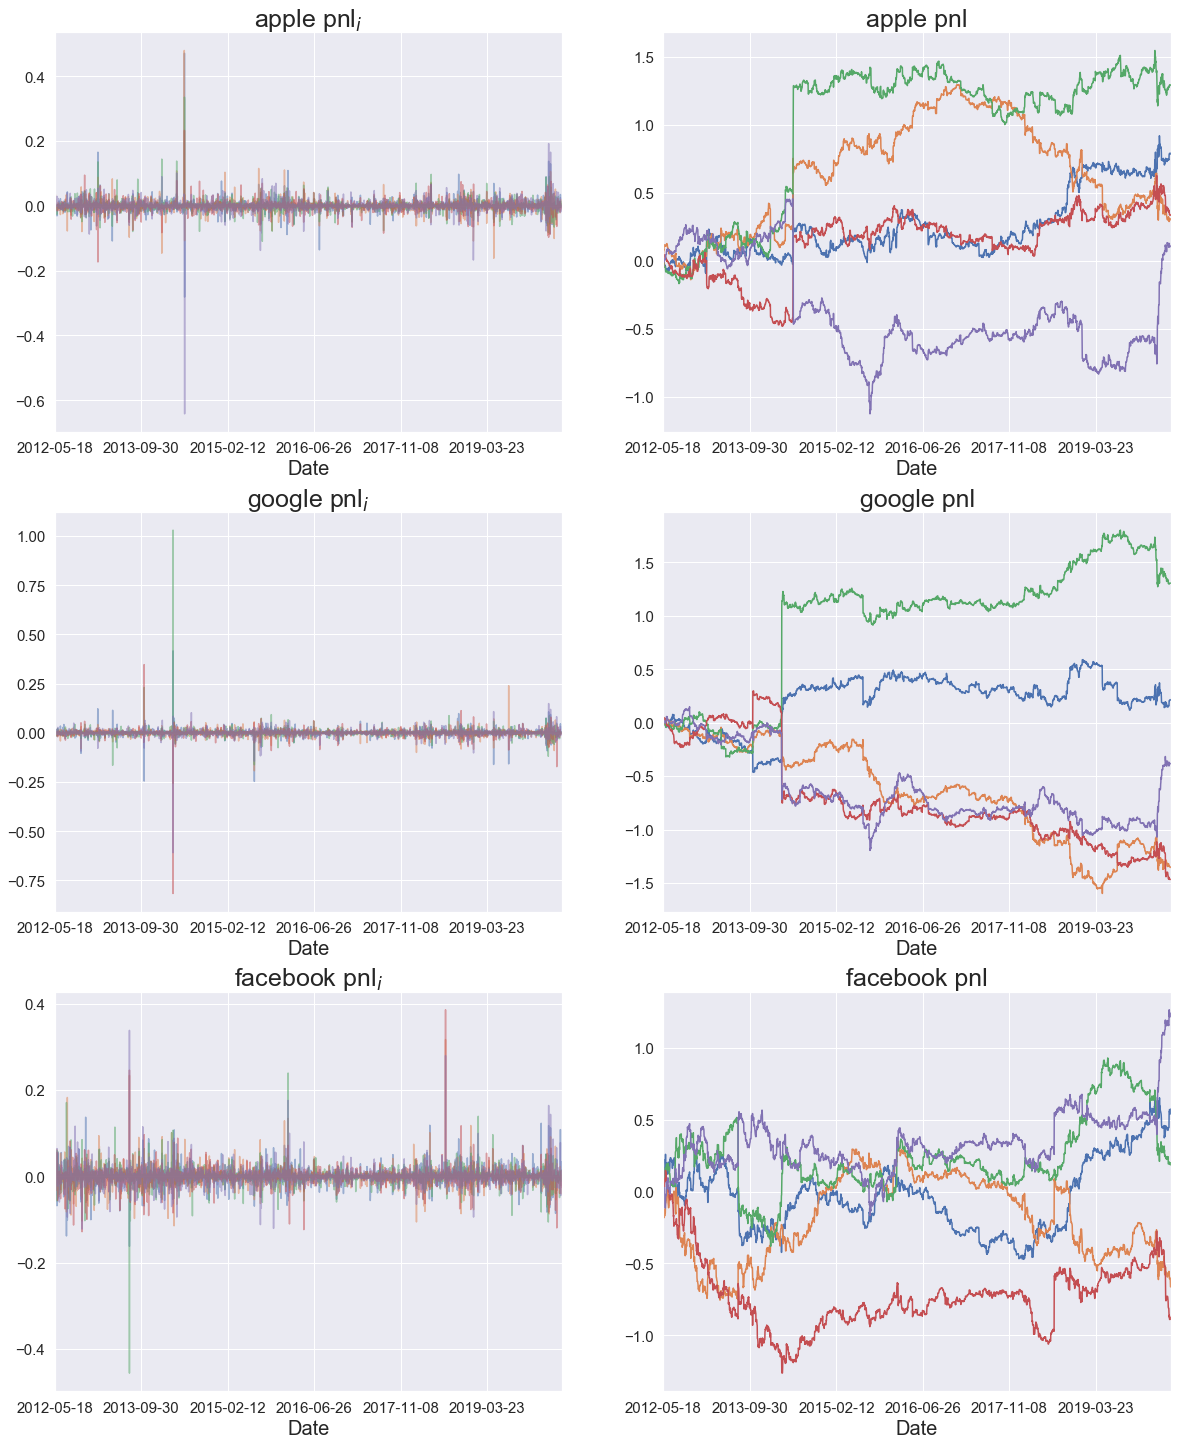

In [53]:
f_is = scs.norm.rvs(0, 1, (5, N))

plt.figure(figsize=(20, 25))
for idx, stock in enumerate(returns):
    plt.subplot(3, 2, 2*idx+1)
    for f_i in f_is:
        pnl_i = pd.Series(f_i * returns[stock], index=dates[:-1])
        pnl_i.plot(alpha=0.5)
    plt.title(stock + r' pnl${}_i$', fontsize=25)
    plt.xlabel('Date', fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)
    plt.subplot(3, 2, 2*idx+2)
    for f_i in f_is:
        pnl_i = pd.Series(f_i * returns[stock], index=dates[:-1])
        pnl_i.cumsum().plot()
    plt.title(stock + r' pnl', fontsize=25)
    plt.xlabel('Date', fontsize=20)
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15)

# 4

In [63]:
def SR(r_i, f_i):
    pnl_i = r_i * f_i
    return pnl_i.mean() / np.sqrt(pnl_i.var())

def hit_rate(r_i, f_i):
    return np.mean(np.sign(r_i) == np.sign(f_i))

def generate_HR_SR(r_i, n=10000):
    SRs = np.zeros(n)
    hit_rates = np.zeros(n)
    for i in range(n):
        f_i = np.random.choice(r_i, size=len(r_i), replace=True)
        SRs[i] = SR(r_i, f_i)
        hit_rates[i] = hit_rate(r_i, f_i)
    return hit_rates, SRs

На этот раз, будем делать предсказания f_i из эмпирического распределения соответствующих return'ов.

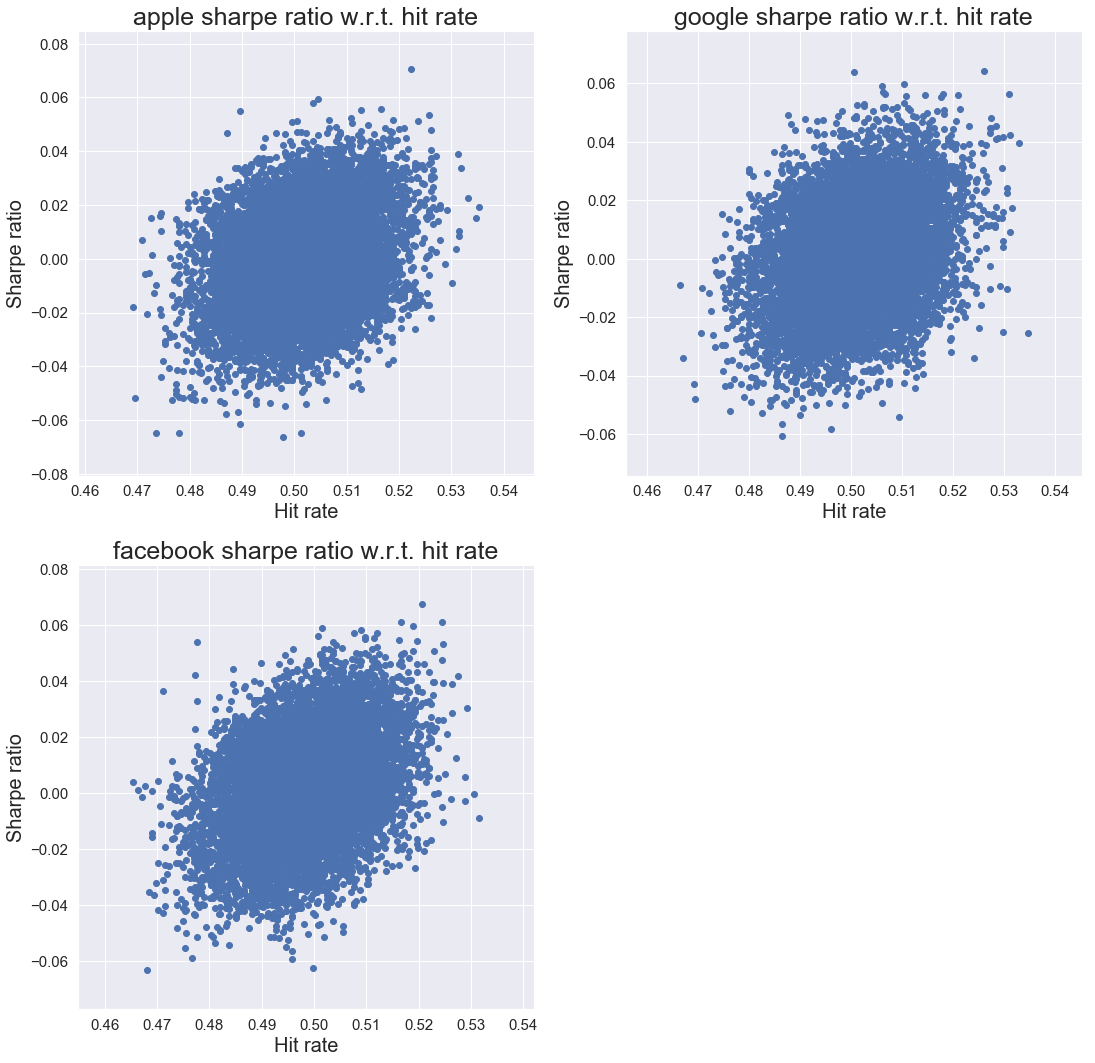

In [66]:
plt.figure(figsize=(18, 18))
for idx, stock in enumerate(returns, 1):
    hit_rates, SRs = generate_HR_SR(returns[stock])
    plt.subplot(2, 2, idx)
    plt.scatter(hit_rates, SRs)
    plt.title(stock + ' sharpe ratio w.r.t. hit rate', fontsize=25)
    plt.xlabel('Hit rate', fontsize=20)
    plt.ylabel('Sharpe ratio', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)